In [1]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv("thecure_discography.csv")

#preformatovani z yyyy-mm-dd na yyyy
data['album_release_year'] = pd.to_datetime(data['album_release_year']).dt.year
#ziskani unikatnich roku
years = data['album_release_year'].unique()

print(data.album_release_year)

Matplotlib is building the font cache; this may take a moment.


0      1982
1      1982
2      1982
3      1982
4      1982
       ... 
218    2011
219    2011
220    2011
221    2011
222    2011
Name: album_release_year, Length: 223, dtype: int32


## Popularita vs tónina

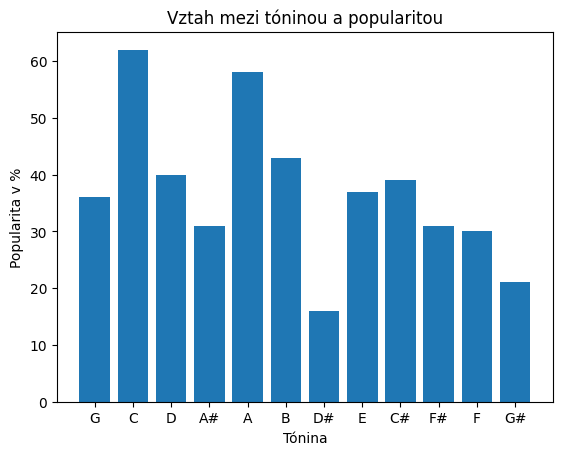

In [2]:
plt.bar(data['key'], data['track_popularity'])
plt.title('Vztah mezi tóninou a popularitou')
plt.xlabel('Tónina')
plt.ylabel('Popularita v %')
plt.show()

## Histogram délky skladeb

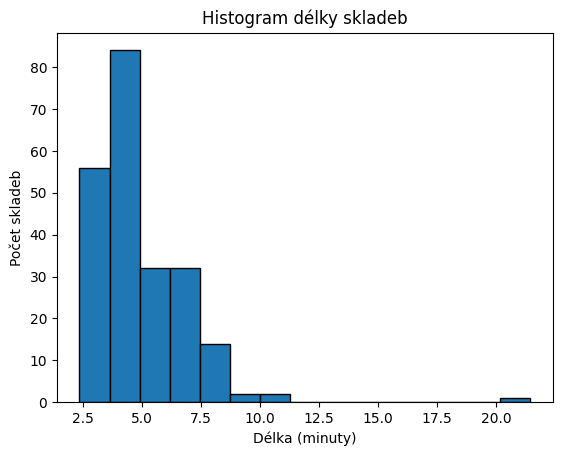

In [3]:
plt.hist(data['duration_ms'] / (1000 * 60), bins=15, edgecolor='black')
plt.title('Histogram délky skladeb')
plt.xlabel('Délka (minuty)')
plt.ylabel('Počet skladeb')
plt.show()

## Podíl instrumentálních skladeb

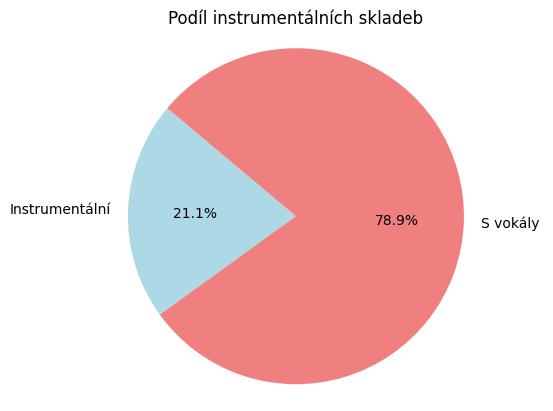

In [4]:
instrumental_count = data[data['instrumentalness'] > 0.5].shape[0]
vocal_count = data.shape[0] - instrumental_count

labels = ['Instrumentální', 'S vokály']
sizes = [instrumental_count, vocal_count]
colors = ['lightblue', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Podíl instrumentálních skladeb')
plt.axis('equal')
plt.show()

## Hlasitost podle roku vydání

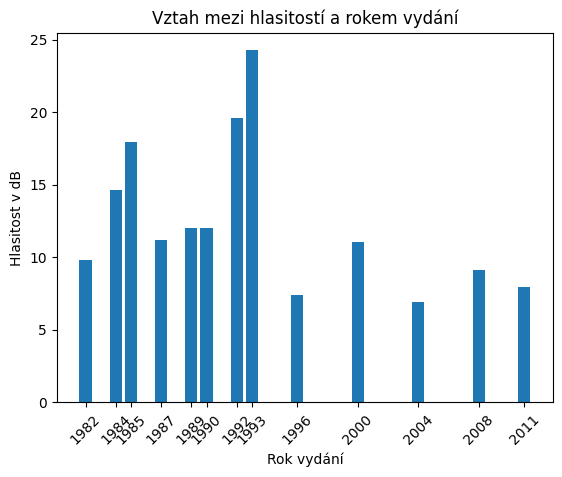

In [5]:
inverted_loudness = -data['loudness']
plt.bar(data['album_release_year'], inverted_loudness, width=0.8)
plt.title('Vztah mezi hlasitostí a rokem vydání')
plt.xlabel('Rok vydání')
plt.ylabel('Hlasitost v dB')
plt.xticks(years, rotation=45)
plt.show()

## Popularita podle tanečnosti

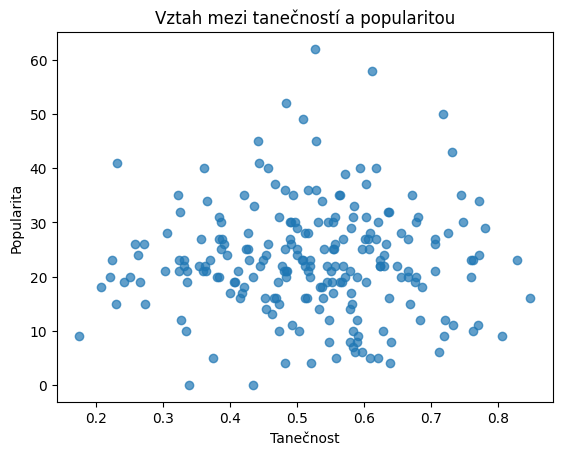

In [6]:
plt.scatter(data['danceability'], data['track_popularity'], alpha=0.7)
plt.title('Vztah mezi tanečností a popularitou')
plt.xlabel('Tanečnost')
plt.ylabel('Popularita')
plt.show()